In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Cel
Zbudowanie modelu klasyfikującego skoliozę - jako tako udany

# Ładowanie Danych

In [3]:
import os
import cv2
import scripts.image_label_loader as iml
import numpy as np

data_dir = '../Datasets/X-Ray/scoliosis'
train_images, train_labels = iml.load_images_and_labels(data_dir, 'train')
valid_images, valid_labels = iml.load_images_and_labels(data_dir, 'valid')
test_images, test_labels = iml.load_images_and_labels(data_dir, 'test')

print(f'Train images: {len(train_images)}, Train labels: {len(train_labels)}')
print(f'Train shape {train_images[0].shape}')
print(f'Valid images: {len(valid_images)}, Valid labels: {len(valid_labels)}')
print(f'Test images: {len(test_images)}, Test labels: {len(test_labels)}')

train_images = np.array(train_images).astype(np.float32)
train_labels = np.array(train_labels).astype(np.float32)
test_images = np.array(test_images).astype(np.float32)
test_labels = np.array(test_labels).astype(np.float32)
valid_images = np.array(valid_images).astype(np.float32)
valid_labels = np.array(valid_labels).astype(np.float32)

train_images = train_images / 255.0
test_images = test_images / 255.0
valid_images = valid_images / 255.0

Train images: 862, Train labels: 862
Train shape (120, 60, 3)
Valid images: 100, Valid labels: 100
Test images: 100, Test labels: 100


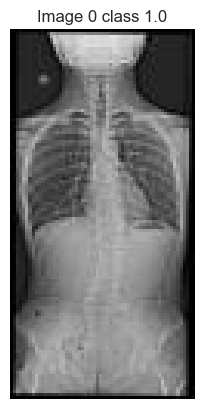

In [4]:
for i in range(0, 1):
    plt.imshow(train_images[i])
    plt.title(f'Image {i} class {train_labels[i]}') 
    plt.axis('off')  
    plt.show()  

# Tworzenie Modelu

In [5]:
import tensorflow
import keras
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sea
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc

In [6]:
model = Sequential([
    Conv2D(120, (3, 3), activation='relu', input_shape=(120, 60, 3)),  # Użycie 3 kanałów
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(48, activation='relu'),
    Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',  
              metrics=['accuracy'])

C:\Users\jakub\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(valid_images, valid_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Dokładność klasyfikacji:', test_acc)

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 17s 538ms/step - accuracy: 0.7705 - loss: 0.4312 - val_accuracy: 0.8800 - val_loss: 0.3183
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 389ms/step - accuracy: 0.8570 - loss: 0.3554 - val_accuracy: 0.8800 - val_loss: 0.2143
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 353ms/step - accuracy: 0.8791 - loss: 0.2517 - val_accuracy: 0.8900 - val_loss: 0.2070
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 348ms/step - accuracy: 0.8947 - loss: 0.2673 - val_accuracy: 0.9200 - val_loss: 0.3150
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 335ms/step - accuracy: 0.9213 - loss: 0.2589 - val_accuracy: 0.9300 - val_loss: 0.1927
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 326ms/step - accuracy: 0.9198 - loss: 0.1826 - val_accuracy: 0.9300 - val_loss: 0.1660
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 333ms/step - accuracy: 0.9317 - loss: 0.1764 - val_accuracy: 0.9000 - val_loss: 0.1647
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 335ms/step - accuracy: 0.9158 - loss: 0.1863 - val_accuracy:

# Statystyki Uczenia

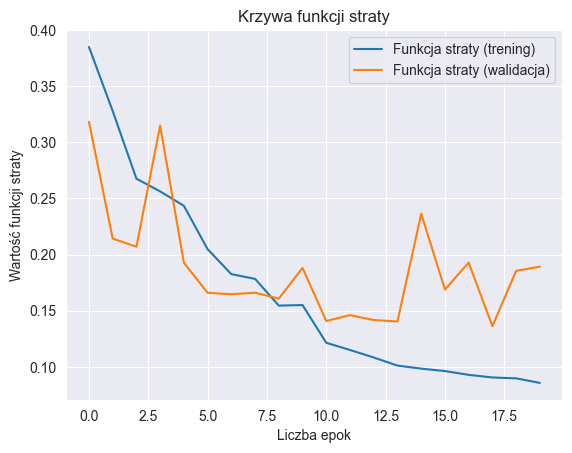

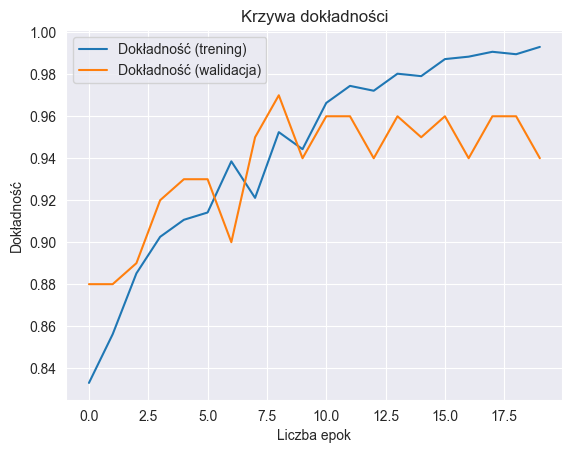

In [8]:
plt.plot(history.history['loss'], label='Funkcja straty (trening)')
plt.plot(history.history['val_loss'], label='Funkcja straty (walidacja)')
plt.xlabel('Liczba epok')
plt.ylabel('Wartość funkcji straty')
plt.legend()
plt.title('Krzywa funkcji straty')
plt.show()
plt.plot(history.history['accuracy'], label='Dokładność (trening)')
plt.plot(history.history['val_accuracy'], label='Dokładność (walidacja)')
plt.xlabel('Liczba epok')
plt.ylabel('Dokładność')
plt.legend()
plt.title('Krzywa dokładności')
plt.show()

In [9]:
print(f"Wymiary testowych danych: {test_images.shape}\n")
pred_label = model.predict(test_images)
print(f"Dane odpowiedzi prosto z modelu: {pred_label}\n")
pred_label = np.where(pred_label > 0.5, 1, 0)
print(f"Dane po konwersji: {pred_label}\n")

Wymiary testowych danych: (100, 120, 60, 3)
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step
Dane odpowiedzi prosto z modelu: [[0.9999349 ]
 [0.9999968 ]
 [0.9999878 ]
 [0.9999798 ]
 [0.99999815]
 [0.99999964]
 [0.99999994]
 [0.8060927 ]
 [0.9995928 ]
 [1.        ]
 [1.        ]
 [0.9999999 ]
 [0.97505397]
 [0.99998146]
 [0.89673364]
 [1.        ]
 [0.99999815]
 [0.95754486]
 [1.        ]
 [0.99999785]
 [0.99234736]
 [0.99995226]
 [0.99999976]
 [0.99999887]
 [0.99999887]
 [0.9998392 ]
 [0.99996305]
 [0.99206597]
 [0.9999657 ]
 [0.99999934]
 [0.99999964]
 [0.99999666]
 [0.9996925 ]
 [1.        ]
 [0.9999642 ]
 [0.9999884 ]
 [0.55238307]
 [0.41950187]
 [0.41950187]
 [0.41950187]
 [0.41950187]
 [0.41950187]
 [0.41950187]
 [0.41950187]
 [0.41950187]
 [0.4516076 ]
 [0.41950187]
 [0.41950187]
 [0.41950187]
 [0.41950187]
 [0.41950187]
 [0.41950187]
 [0.41950187]
 [0.41950187]
 [0.41950187]
 [0.41950187]
 [0.41950187]
 [0.4703619 ]
 [0.41950187]
 [0.41950187]
 [0.4230319 ]
 [0.4204644 ]
 [0.4204644 ]
 [

[28 66]


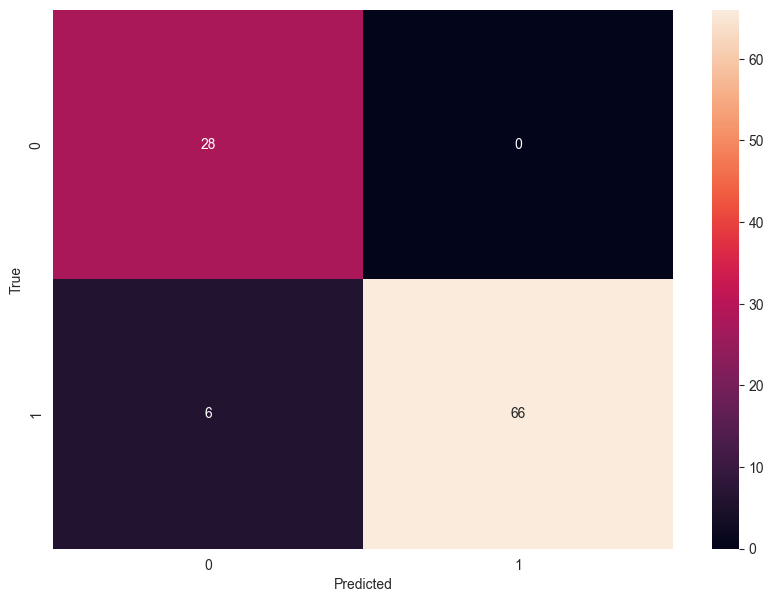

In [10]:
# Obliczenie confusion matrix
cm = confusion_matrix(pred_label, test_labels)

print(cm.diagonal())

# Tworzenie DataFrame z confusion matrix
df_cm = pd.DataFrame(cm, index = [i for i in range(2)], columns = [i for i in range(2)])

# Tworzenie heatmapy confusion matrix
plt.figure(figsize = (10,7))
sea.heatmap(df_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [10]:
# sprawdzenie dla zdjęcia spoza datasetu skoliozy
img = cv2.imread("../Datasets/X-Ray/scoliosis/new_images/1_scoliosisjpg.jpg")
print(img)
my_img = []
my_img.append(img)
my_img = np.array(my_img).astype(np.float32)
my_img = my_img / 255.0
my_img.shape

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


(1, 2000, 1045, 3)

In [ ]:
prot_lab = model.predict(my_img)

In [ ]:
prot_lab

In [ ]:
plt.imshow(my_img[0])
plt.title(f'Image {0} class {prot_lab}') 
plt.axis('off')  
plt.show()  

In [11]:
import pickle

with open('../model/model.pkl', 'wb') as f:
    pickle.dump(model, f)